# Chapter 2 Random Variables Part IV

#### *Zhuo Jianchao* 

Feb 14, 2020 *Rev 1*

## Functions of a Random Variable

Recall that a random variable is a measurable mapping from original sample space into sample space in the real line, the way the measurable mapping is constructed is by our own will. We can require even number rolled of a dice to be $0$, to be $1$, or whatever else legitimate according to the problem concerned. 

Suppose $g:\mathbb{R} \rightarrow \mathbb{R}$ is a real-valued measurable funtion. For a random variable $X$, its transformation $Y=g(X)$ is also a random variable. 

Let's take an example to illustrate it.

### Discrete Case: Transformation of Possion Random Variable

We've mentioned before an important kind of discrete random variable, possion random variable $X$, which takes on any natural numbers and possesses the following PMF
$$P(X=x)=\frac{\lambda^x}{x!}e^{-\lambda}, \text{ denoted as } P(\lambda)$$

We can draw the value and its corresponding probability in the $(x,y)$ plane.

In [1]:
using Plots
using Distributions
using StatsPlots

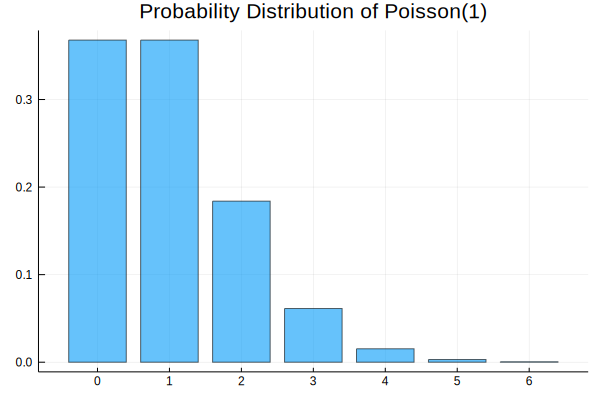

In [2]:
poisson1 = Poisson(1)
plot(poisson1, legend = false, seriestype=:bar, α = 0.6)
title!("Probability Distribution of Poisson(1)")

As value that the random variable can take on becomes larger, the probability decreases dramatically, nearly reaching 0 at 6.

What about $X^2$? How probability is distributed among possible outcomes of $X^2$? 

In this case, we define a new random variable $Y$ such that $Y=g(X)=X^2$ and ask for the PMF of $Y$. We have the following relations to hold.

|$X$|$Y=X^2$|$PMF_{X}$|$PMF_{Y}$|
|:-:|:-:|:-:|:-:|
|0|0|$P(X=0)$|$P(X=0)$|
|1|1|$P(X=1)$|$P(X=1)$|
|2|4|$P(X=2)$|$P(X=2)$|
|3|9|$P(X=3)$|$P(X=9)$|
|4|16|$P(X=4)$|$P(X=4)$|
|5|25|$P(X=5)$|$P(X=5)$|
|6|36 <img width=100/>|$P(X=6)$ <img width=100/>|$P(X=6)$ <img width=100/>|
|$\cdots$|$\cdots$|$\cdots$|$\cdots$|

The transformation $Y=X^2$ is reflected by transformation of every possible outcome of $X$ into corresponding possible value of $Y$. And the probability for $Y$ to take on a given value is actually the probability for $X$ to take on the value which results in the given value of $Y$.

Let's plot the probability distribution of $Y$.

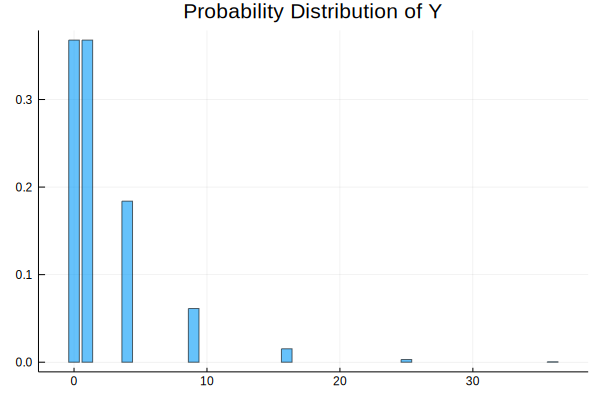

In [3]:
plot([(x^2, y) for x in 0:1:6 for y in pdf.(poisson1, x)],
    seriestype=:bar, legend=false, α = 0.6)
title!("Probability Distribution of Y")

The relative probability among basic outcomes in the support of $Y$ is exactly the same as those in the support of $X$. The only difference is that the exact value of the basic outcomes of $Y$ is transformed from the exact value of corresponding basic outcomes of $X$ through the mapping $g(X)=X^2$. The probability function only require probability be legally distributed among different outcomes regardless of what value each outcome takes.

### Continuous Case: Transformation of Standard Normal Random Variable

A random variable $X$ is said to follow a standard normal distribution if its PDF $f_{X}(x)$ has the following functional form
$$f_{X}(x)=\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}, x \in (-\infty, +\infty)$$

What is the probability of the distribution of $Y$, if $Y=g(X)=X^2$?

We can first visualize the PDF and CDF of $X$.

In [4]:
using QuadGK

In [5]:
# mathematical function of PDF of X

std_norm(x) = exp(-x^2/2)/sqrt(2π)

# funtion of CDF of X, by definition

function cdf_x(x)
    int, error = quadgk(std_norm, -Inf, x, rtol = 1e-8)
    return int
end

cdf_x (generic function with 1 method)

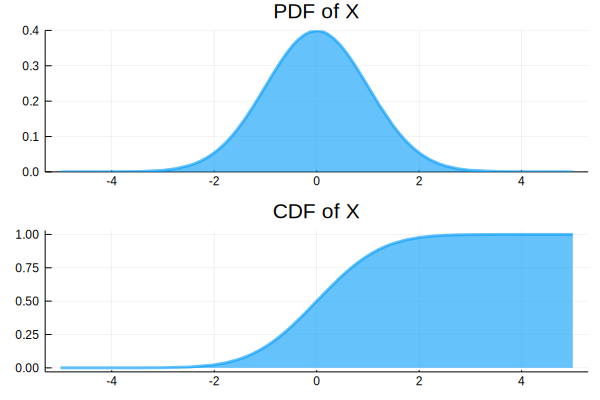

In [6]:
pdf_plt = plot(std_norm, title = "PDF of X",
        legend = false, 
        fill = 0, 
        α = 0.6, 
        lw = 3, 
        ylim = (0,0.4))

cdf_plt = plot(cdf_x, title = "CDF of X",
        legend = false, 
        fill = 0, 
        α = 0.6, 
        lw = 3)

plot(pdf_plt, cdf_plt, layout = (2,1))

Since the probability is not measurable at single value of $X$, one-to-one transformation from sample space of $X$ to that of $Y$ is not available.

PDF of $Y$ is not easy to find because of the concept *density*, but we can dive into this problem using CDF since CDF is defined as probability of events.

By definition of $F_{Y}(y)$,
$$
F_{Y}(y)=P(Y \leq y)=P(X^2 \leq y)=P(-\sqrt{y} \leq X \leq \sqrt{y})
$$

We've known that the probability of a random variable $X$ to fall into some interval from $a$ to $b$ is the integral of $X$ from $a$ to $b$, then,
$$
F_{Y}(y)=P(-\sqrt{y} \leq X \leq \sqrt{y})=\int_{-\sqrt{y}}^{\sqrt{y}}f_{X}(x) \: dx = \int_{-\sqrt{y}}^{\sqrt{y}}\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}} \: dx = \frac{e^{-\frac{y}{2}}}{\sqrt{2\pi y}}
$$

Now we have the mathematical expression of $F_{Y}(y)=\int_{-\sqrt{y}}^{\sqrt{y}}\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}} \: dx$. Taking derivative of $F_{Y}(y)$ with respect to $y$ yields PDF of $Y$,

$$f_{Y}(y) = F'_{Y}(y) = \frac{d(\int_{-\sqrt{y}}^{\sqrt{y}}\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}} \: dx)}{dy} = \frac{e^{-\frac{y}{2}}}{\sqrt{2\pi y}}$$

Now we gain the functional form of $Y=X^2$, drawn as below.

In [7]:
pdf_y(y) = exp(-y^2/2)/sqrt(2π*y)

function cdf_y(y)
        int, error = quadgk(pdf_y, 0, y, rtol = 1e-8)
    return int
end

cdf_y (generic function with 1 method)

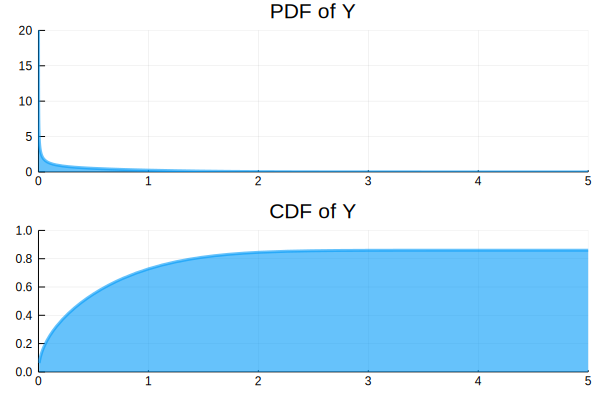

In [8]:
pdf_y_plt = plot(pdf_y,  title = "PDF of Y",
        legend = false, 
        fill = 0, 
        α = 0.6, 
        lw = 3,
        xlim = (0,5),
        ylim = (0,20))

cdf_y_plt = plot(cdf_y,  title = "CDF of Y",
        legend = false, 
        fill = 0, 
        α = 0.6, 
        lw = 3,
        xlim = (0,5), ylim = (0,1))

plot(pdf_y_plt, cdf_y_plt, layout = (2,1))

This is a fundamental method to transform probability distribution of one random variable to that of its function. This example can be easily extended to more complex cases.